In [1]:
#loading the data
import pandas as pd
data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem2/AML/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
data=data.drop(columns=['Administrative','Informational','ProductRelated','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'],axis=1)
data.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0


In [3]:
#applying k-means on product related duration and exit rates
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['ProductRelated_Duration','ExitRates']])
data['cluster_number'] = kmeans.labels_
data.head()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,cluster_number
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,0


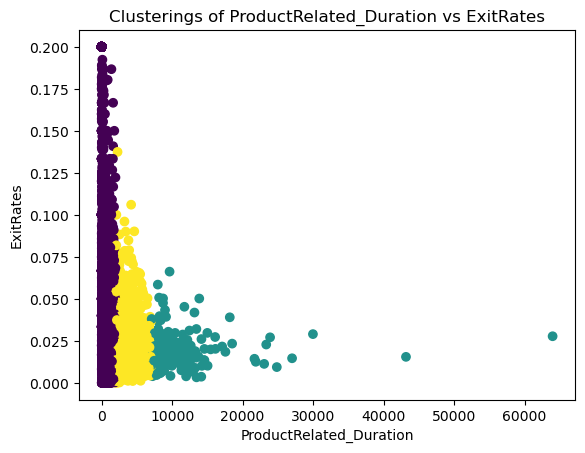

In [4]:
#The c parameter in plt.scatter is used to specify the color of each point based on the cluster to which it belongs.
import matplotlib.pyplot as plt

plt.xlabel("ProductRelated_Duration")
plt.scatter(x=data['ProductRelated_Duration'],y=data['ExitRates'],c=data['cluster_number'])
plt.ylabel("ExitRates")
plt.title("Clusterings of ProductRelated_Duration vs ExitRates")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

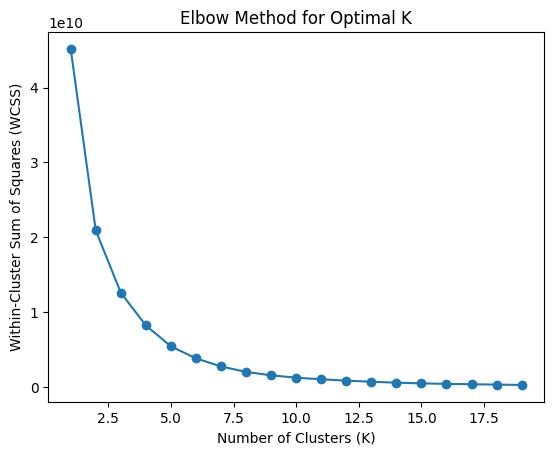

In [5]:
#plotting the elbow to find number of clusters
from sklearn.datasets import make_blobs
k_values = range(1, 20)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['ProductRelated_Duration','BounceRates']])
    wcss.append(kmeans.inertia_)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()



In [5]:

from sklearn.cluster import KMeans
# Incorporating optimal number of cluster value
kmeans = KMeans(n_clusters=5)
kmeans.fit(data[['ProductRelated_Duration','BounceRates']])
labels = kmeans.labels_
data['cluster_number'] = labels
data.head()

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,cluster_number
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,0


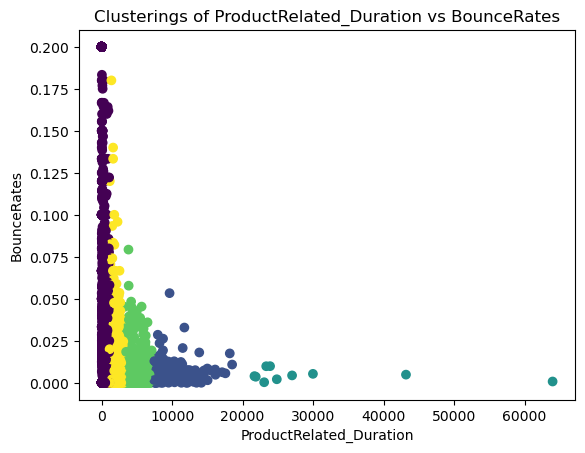

In [6]:
#The c parameter in plt.scatter is used to specify the color of each point based on the cluster to which it belongs.
plt.scatter(x=data['ProductRelated_Duration'],y=data['BounceRates'],c=data['cluster_number'])
plt.xlabel("ProductRelated_Duration")
plt.ylabel("BounceRates")
plt.title("Clusterings of ProductRelated_Duration vs BounceRates")
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data[['ProductRelated_Duration','BounceRates']], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6530287984651222


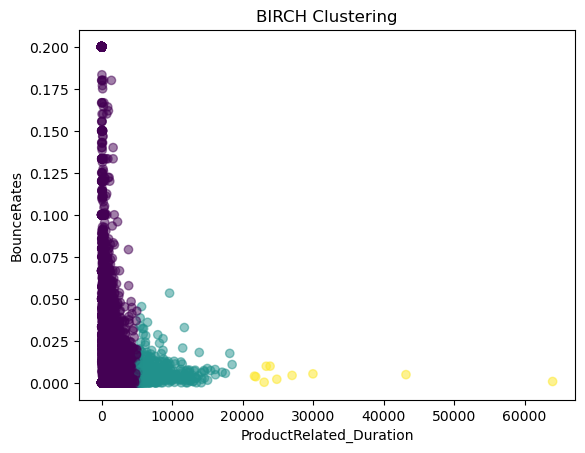

In [8]:

from sklearn.cluster import Birch

# Specify the number of clusters (n_clusters)
n_clusters = 5

# Initialize BIRCH model
birch = Birch()
# birch = Birch(n_clusters=n_clusters). optional.

# Fit the model to the data
birch.fit(data[['ProductRelated_Duration', 'BounceRates']])

# Get cluster assignments
labels = birch.labels_

# Plot the clusters using the specific column names
plt.scatter(data['ProductRelated_Duration'], data['BounceRates'], c=labels, cmap='viridis', alpha=0.5)
plt.title('BIRCH Clustering')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('BounceRates')
plt.show()

In [9]:

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data[['ProductRelated_Duration','BounceRates']], labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.8150362970670775


In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(data[['ProductRelated_Duration','BounceRates']], method='ward')
# Plot the dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Set a threshold to cut the dendrogram and obtain clusters
threshold = 1.5
clusters = fcluster(linkage_matrix, threshold, criterion='distance')
print("Cluster Assignments:", clusters)

In [ ]:

# Calculate silhouette score
silhouette_avg = silhouette_score(data[['ProductRelated_Duration','BounceRates']], clusters)
print("Silhouette Score:", silhouette_avg)

We can clearly observe from the Silhouette Score that BIRCH algorithm did the best clustering while taking number of clusters as 3. K-Means with 5 number of clusters also performed decently well. Silhouette Score for Agglomerative clustering while minimizing the within cluster variance performed the worst with a score of just above 0.6. It is to be noted in this regard a higher value of Silhouette Coefficient indicate better-defined, more separated clusters.